In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ecommerce_products.csv")
df.head()

product_name   price  rating  reviews category
0          Asus VivoBook X441NA-GA190  295.99       3       14   Laptop
1  Prestigio SmartBook 133S Dark Grey  299.00       2        8   Laptop
2       Prestigio SmartBook 133S Gold  299.00       4       12   Laptop
3                       Aspire E1-510  306.99       3        2   Laptop
4                   Lenovo V110-15IAP  321.94       3        5   Laptop

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  117 non-null    object 
 1   price         117 non-null    float64
 2   rating        117 non-null    int64  
 3   reviews       117 non-null    int64  
 4   category      117 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.7+ KB


In [8]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  117 non-null    object 
 1   price         117 non-null    float64
 2   rating        117 non-null    int64  
 3   reviews       117 non-null    int64  
 4   category      117 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.7+ KB


In [10]:
df.describe()

price      rating     reviews
count   117.000000  117.000000  117.000000
mean    909.393846    2.341880    6.897436
std     401.311429    1.107672    4.255594
min     295.990000    1.000000    0.000000
25%     469.100000    1.000000    3.000000
50%    1102.660000    2.000000    7.000000
75%    1221.580000    3.000000   10.000000
max    1799.000000    4.000000   14.000000

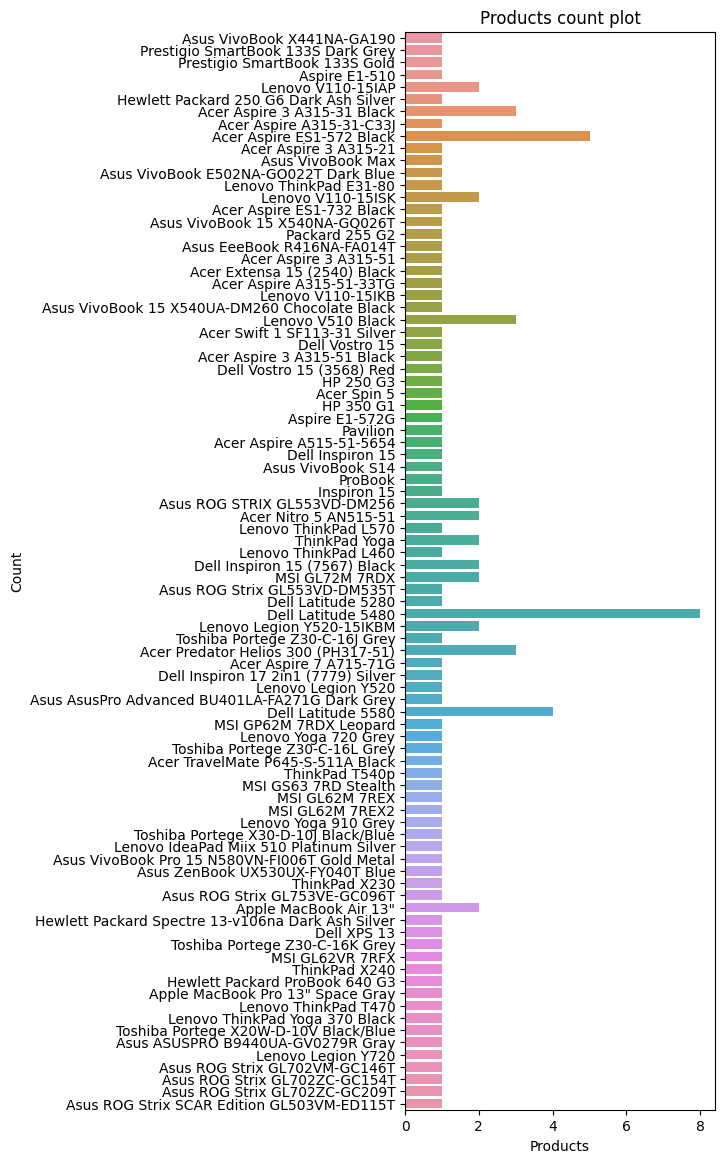

In [12]:
plt.figure(figsize=(4,14))
sns.countplot(data=df, y='product_name')
plt.title("Products count plot")
plt.xlabel("Products")
plt.ylabel("Count")
plt.show()

In [14]:
df['productlist'] = df.product_name.str.split()
df.head()

product_name   price  rating  reviews category  \
0          Asus VivoBook X441NA-GA190  295.99       3       14   Laptop   
1  Prestigio SmartBook 133S Dark Grey  299.00       2        8   Laptop   
2       Prestigio SmartBook 133S Gold  299.00       4       12   Laptop   
3                       Aspire E1-510  306.99       3        2   Laptop   
4                   Lenovo V110-15IAP  321.94       3        5   Laptop   

                                productlist  
0            [Asus, VivoBook, X441NA-GA190]  
1  [Prestigio, SmartBook, 133S, Dark, Grey]  
2        [Prestigio, SmartBook, 133S, Gold]  
3                          [Aspire, E1-510]  
4                      [Lenovo, V110-15IAP]

### Identify most popular brands

In [17]:
df['brand'] = df['productlist'].str[0]

In [19]:
df.head()

product_name   price  rating  reviews category  \
0          Asus VivoBook X441NA-GA190  295.99       3       14   Laptop   
1  Prestigio SmartBook 133S Dark Grey  299.00       2        8   Laptop   
2       Prestigio SmartBook 133S Gold  299.00       4       12   Laptop   
3                       Aspire E1-510  306.99       3        2   Laptop   
4                   Lenovo V110-15IAP  321.94       3        5   Laptop   

                                productlist      brand  
0            [Asus, VivoBook, X441NA-GA190]       Asus  
1  [Prestigio, SmartBook, 133S, Dark, Grey]  Prestigio  
2        [Prestigio, SmartBook, 133S, Gold]  Prestigio  
3                          [Aspire, E1-510]     Aspire  
4                      [Lenovo, V110-15IAP]     Lenovo

In [21]:
df.brand.value_counts()

brand
Acer         25
Lenovo       20
Dell         20
Asus         19
MSI           7
ThinkPad      5
Toshiba       5
Hewlett       3
Apple         3
Prestigio     2
Aspire        2
HP            2
Packard       1
Pavilion      1
ProBook       1
Inspiron      1
Name: count, dtype: int64

since few of the brands shown above are the actually not brand names they are the series name of the brand
so mapping the seriesname to the brand below

In [24]:
brand_map = {
    "Aspire":"Acer",
    "Inspiron":"Dell",
    "ThinkPad":"Lenovo",
    "Hewlett":"HP",
    "Packard":"HP",
    "ProBook":"HP",
    "Pavilion":"HP"
}

df['brand'] = df['brand'].replace(brand_map)
#df.brand.value_counts(normalize=True)*100
brand_sort_order=df['brand'].value_counts().sort_values(ascending=False).index 
print(brand_sort_order)
df.brand.value_counts()

Index(['Acer', 'Lenovo', 'Dell', 'Asus', 'HP', 'MSI', 'Toshiba', 'Apple',
       'Prestigio'],
      dtype='object', name='brand')


brand
Acer         27
Lenovo       25
Dell         21
Asus         19
HP            8
MSI           7
Toshiba       5
Apple         3
Prestigio     2
Name: count, dtype: int64

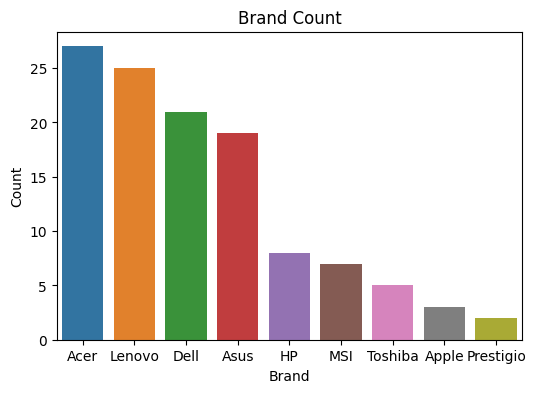

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='brand', order=brand_sort_order)
#sns.barplot(data=brand, x='brand', y='count', hue='brand')
plt.title("Brand Count")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

From the above plot it is clear that "Acer" is the most popular brand followed by "Lenovo", "Dell","Asus" subsequently

### Top 5 popular series

In [30]:
series_map = {
    "Latitude": ["Latitude"],
    "Inspiron": ["Inspiron"],
    "Vostro": ["Vostro"],
    "XPS": ["XPS"],

    "ThinkPad": ["ThinkPad"],
    "Yoga": ["Yoga"],
    "Legion": ["Legion"],
    "IdeaPad": ["IdeaPad"],
    "V-Series": ["V110", "V510"],

    "Aspire": ["Aspire"],
    "Predator": ["Predator"],
    "Nitro": ["Nitro"],
    "TravelMate": ["TravelMate"],
    "Spin": ["Spin"],
    "Swift": ["Swift"],
    "Extensa": ["Extensa"],

    "MacBook": ["MacBook"],

    "ROG": ["ROG", "Strix"],
    "VivoBook": ["VivoBook"],
    "ZenBook": ["ZenBook"],
    "AsusPro": ["AsusPro", "ASUSPRO"],
    "EeeBook": ["EeeBook"],

    "MSI Gaming": ["GL", "GP", "GS"],

    "Portege": ["Portege"],
    "Spectre": ["Spectre"],
    "ProBook": ["ProBook"],
    "Pavilion": ["Pavilion"],
    "SmartBook": ["SmartBook"],
    "Packard": ["Packard"],
    "HPEntry": ["250","350"]
}

def extract_series(name):
    for series, keywords in series_map.items():
        if any(k.lower() in name.lower() for k in keywords):
            return series
    return "Unclassified"

df['series'] = df['product_name'].apply(extract_series)

In [32]:
df.head()

product_name   price  rating  reviews category  \
0          Asus VivoBook X441NA-GA190  295.99       3       14   Laptop   
1  Prestigio SmartBook 133S Dark Grey  299.00       2        8   Laptop   
2       Prestigio SmartBook 133S Gold  299.00       4       12   Laptop   
3                       Aspire E1-510  306.99       3        2   Laptop   
4                   Lenovo V110-15IAP  321.94       3        5   Laptop   

                                productlist      brand     series  
0            [Asus, VivoBook, X441NA-GA190]       Asus   VivoBook  
1  [Prestigio, SmartBook, 133S, Dark, Grey]  Prestigio  SmartBook  
2        [Prestigio, SmartBook, 133S, Gold]  Prestigio  SmartBook  
3                          [Aspire, E1-510]       Acer     Aspire  
4                      [Lenovo, V110-15IAP]     Lenovo   V-Series

In [34]:
top_series = (
    df.groupby(['brand','series'])
    .size()
    .reset_index(name='count')
    #.sort_values(by='count', ascending=False)
)
top5_series = top_series.nlargest(5, columns='count')
top5_series

brand    series  count
0     Acer    Aspire     18
14    Dell  Latitude     13
24  Lenovo  ThinkPad     10
10    Asus       ROG      8
25  Lenovo  V-Series      8

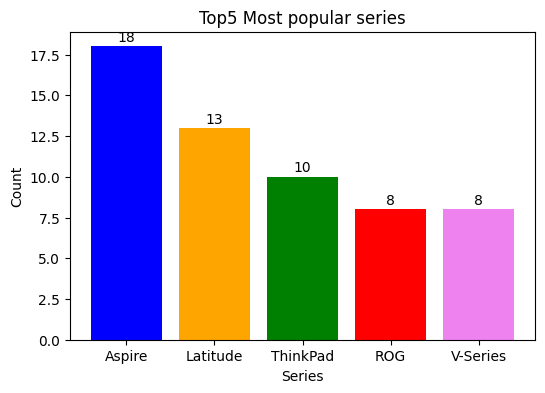

In [36]:
plt.figure(figsize=(6,4))
plt.bar(top5_series['series'], top5_series['count'], color=['blue','orange','green','red','violet'])
plt.title("Top5 Most popular series")
plt.xlabel("Series")
plt.ylabel("Count")

for i, v in enumerate(top5_series["count"]):
    plt.text(i, v+0.3, str(v), color="black", ha="center")

plt.show()


From the above chart Aspire is the most popular series with the total of 18 products
followed by Latitude 13 products and ThinkPad 10 products

### Segment categories based on the series and identify most popular categories

In [40]:
category_map = {
    "Business": [
        "Latitude", "ThinkPad", "ProBook","Extensa",
        "TravelMate", "Portege", "AsusPro","HPEntry"
    ],
    "Consumer": [
        "Inspiron", "Vostro", "Aspire","EeeBook",
        "VivoBook", "IdeaPad", "Pavilion",
        "Packard", "SmartBook", "V-Series"
    ],
    "Gaming": [
        "Predator", "Nitro", "Legion",
        "ROG", "MSI Gaming"
    ],
    # A premium category refers to products that are positioned as high-end, higher quality, or luxury, and 
    # are usually sold at a higher price compared to regular products.
    "Premium": [
        "XPS", "MacBook", "Spectre",
        "ZenBook", "Swift"
    ],
    #Convertible laptop is a device that can work as both a laptop and a tablet.
    "Convertible": [
        "Yoga", "Spin"
    ]
}

def assign_category(series):
    for category, series_list in category_map.items():
        if series in series_list:
            return category
    return "Other"
    
df["category"] = df["series"].apply(assign_category)
top_category = df['category'].value_counts()
top_category

category
Consumer       47
Business       36
Gaming         24
Premium         7
Convertible     3
Name: count, dtype: int64

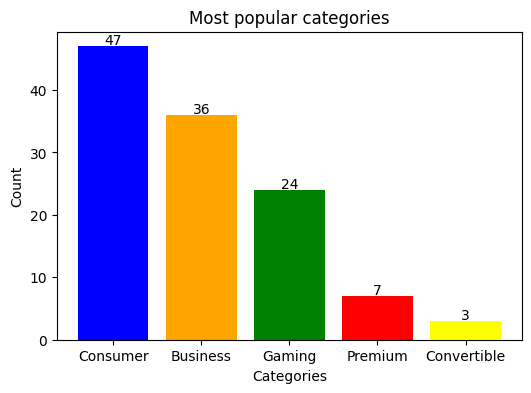

In [42]:
plt.figure(figsize=(6,4))
plt.bar(top_category.index, top_category.values, color=['blue','orange','green','red','yellow','violet'])
plt.title("Most popular categories")
plt.xlabel("Categories")
plt.ylabel("Count")

for i, v in enumerate(top_category):
   plt.text(i, v+0.3, str(v), color="black", ha="center")

plt.show()

Products are segmented into consumer business, gaming, premium, convertible categories depending on the product series. 
so of all the segments a total of 47 consumer products are being sold followed by Business and then Gaming

### Price Distribution

In [46]:
import warnings
warnings.filterwarnings("ignore")

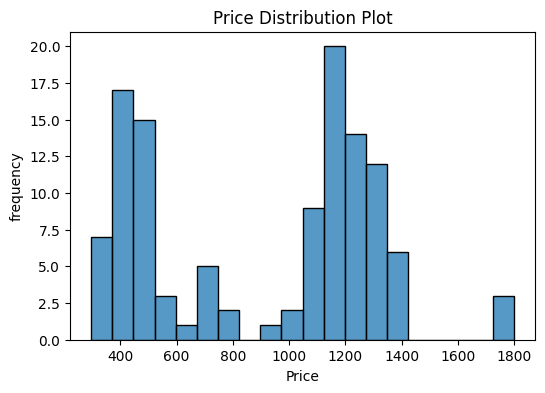

In [48]:
plt.figure(figsize=(6,4))
#plt.hist(df['price'],bins=20)
sns.histplot(data=df, x="price", bins=20)
plt.title("Price Distribution Plot")
plt.xlabel("Price")
plt.ylabel("frequency")
plt.show()

- The overall distribution is not normal — it’s skewed, multimodal, and category-dependent.
- One around $400–$500, likely dominated by budget or consumer-grade products.
- Another around $1100–$1300, representing mid-to-premium offerings.
- Another aroung $1750-$1800, representing high end products.
This suggests the market is segmented into:
- Value-driven buyers seeking affordability.
- Feature-driven buyers willing to invest in higher-end products.
The gap between these clusters may indicate a strategic pricing void or a transition zone with fewer offerings.

### Which categories are expensive vs affordable?

In [52]:
category_avgprice = (
    df.groupby('category')['price']
    .mean()
    .reset_index(name="avgprice")
    .sort_values(by='avgprice',ascending=False)
)
category_avgprice

category     avgprice
3       Gaming  1220.654167
4      Premium  1174.835714
0     Business  1124.200278
2  Convertible   971.480000
1     Consumer   542.422979

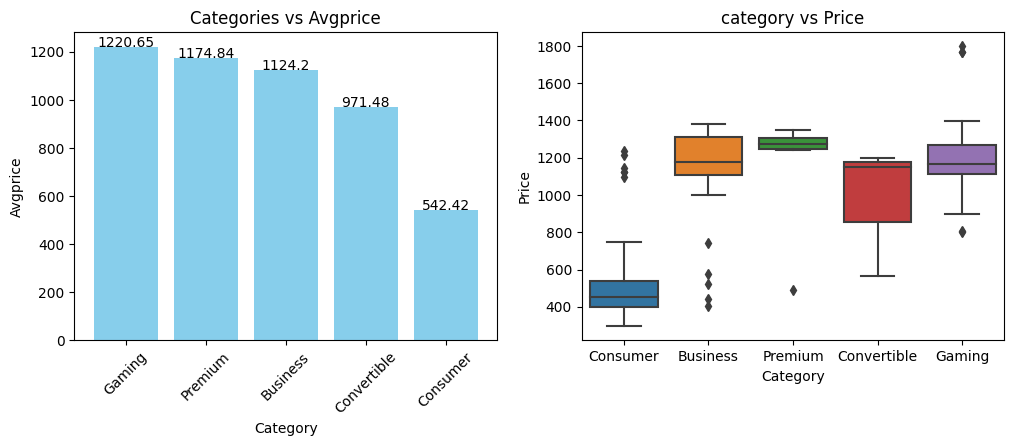

In [54]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

axes[0].bar(category_avgprice['category'], category_avgprice['avgprice'], color='skyblue')
axes[0].set_title("Categories vs Avgprice")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Avgprice")
axes[0].tick_params(axis='x', rotation=45)

for i, v in enumerate(category_avgprice['avgprice']):
    val=round(v,2)
    axes[0].text(i, val+0.05, str(val), color="black", ha="center")
    
sns.boxplot(data=df, x="category", y="price", ax=axes[1])
axes[1].set_title("category vs Price")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Price")

plt.show()
# sns.boxplot(data=df, x="category", y="price")
# plt.title("Prices Vs categories")
# plt.xlabel("Category")
# plt.ylabel("Price")
# plt.show()

- Consumer products are the most affordable overall, but the presence of high-price outliers suggests some premium variants exist.
- Premium category shows the least variability, indicating consistent pricing—likely due to standardized features or branding.
- Gaming products have a broad range and the highest outlier, reflecting the presence of ultra-high-end models.
- Business and Convertible categories overlap in price, but Business has more outliers, suggesting a mix of budget and premium offerings.
- Convertible devices strike a balance between affordability and premium features, with a smooth distribution and fewer anomalies.

### Which brands compete on price?

In [58]:
brand_avgprice = (
    df.groupby('brand')['price']
    .mean()
    .reset_index(name="avgprice")
    .sort_values(by='avgprice',ascending=False)
)
brand_avgprice

brand     avgprice
1      Apple  1313.636667
8    Toshiba  1226.612000
6        MSI  1174.714286
3       Dell  1090.330000
2       Asus   996.141579
5     Lenovo   921.604400
4         HP   728.793750
0       Acer   622.593704
7  Prestigio   299.000000

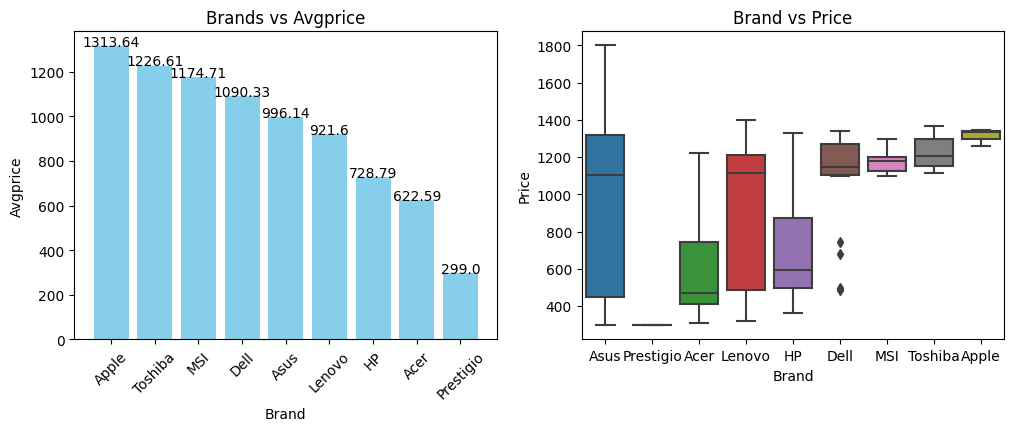

In [62]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

axes[0].bar(brand_avgprice['brand'], brand_avgprice['avgprice'], color='skyblue')
axes[0].set_title("Brands vs Avgprice")
axes[0].set_xlabel("Brand")
axes[0].set_ylabel("Avgprice")
axes[0].tick_params(axis='x', rotation=45)

for i, v in enumerate(brand_avgprice['avgprice']):
    val=round(v,2)
    axes[0].text(i, val+0.05, str(val), color="black", ha="center")
    
sns.boxplot(data=df, x="brand", y="price", ax=axes[1])
axes[1].set_title("Brand vs Price")
axes[1].set_xlabel("Brand")
axes[1].set_ylabel("Price")

plt.show()
# sns.boxplot(data=df, x="brand", y="price")
# plt.title("Price Vs brand")
# plt.xlabel("Brand")
# plt.ylabel("Price")
# plt.show()

- Apple stands out with the highest median price around 1300 indicating a premium pricing strategy and consistent high-end positioning.
- Prestigio has the lowest price range centered around 400 making it the most affordable brand in the comparison.
- Asus spans from 400 to $1800 suggesting a diverse product lineup—from entry-level to high-performance models.
- Dell's main price range is tightly clustered around 1150, indicating a consistent mid-to-premium pricing strategy.The outlier below 1000 stands out as a significantly cheaper model compared to the rest of Dell's lineup.

### Are most products well-rated or poorly rated?

In [57]:
ratings = df.rating.value_counts().reset_index()
ratings['rating'] = ratings['rating'].astype('str')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  4 non-null      object
 1   count   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


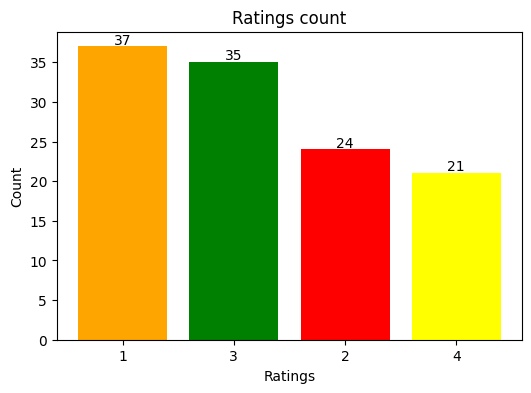

In [59]:
plt.figure(figsize=(6,4))
plt.bar(ratings['rating'], ratings['count'], color=['orange','green','red','yellow'])
plt.title("Ratings count")
plt.xlabel("Ratings")
plt.ylabel("Count")

for i, v in enumerate(ratings['count']):
   plt.text(i, v+0.3, str(v), color="black", ha="center")

plt.show()

Bar chart above shows products overall ratings are poor since 37 products has been rated 1
And medium as the second largest since the 35 prodcts has been rated 3 

### which brand is better rated?

In [63]:
brand_avgrating = (
    df.groupby('brand')['rating']
    .mean()
    .reset_index(name="avgrating")
    .sort_values(by='avgrating',ascending=False)
)
brand_avgrating

brand  avgrating
7  Prestigio   3.000000
0       Acer   2.481481
5     Lenovo   2.480000
3       Dell   2.428571
1      Apple   2.333333
2       Asus   2.315789
4         HP   2.000000
6        MSI   1.857143
8    Toshiba   1.600000

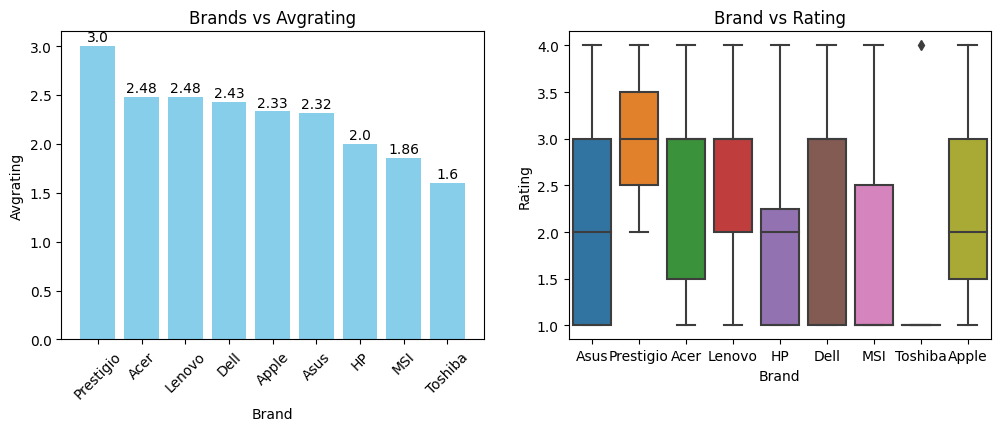

In [65]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

axes[0].bar(brand_avgrating['brand'], brand_avgrating['avgrating'], color='skyblue')
axes[0].set_title("Brands vs Avgrating")
axes[0].set_xlabel("Brand")
axes[0].set_ylabel("Avgrating")
axes[0].tick_params(axis='x', rotation=45)

for i, v in enumerate(brand_avgrating['avgrating']):
    val=round(v,2)
    axes[0].text(i, val+0.05, str(val), color="black", ha="center")
    
sns.boxplot(data=df, x="brand", y="rating", ax=axes[1])
axes[1].set_title("Brand vs Rating")
axes[1].set_xlabel("Brand")
axes[1].set_ylabel("Rating")

plt.show()

- Prestigio Leads in Customer Satisfaction Despite Low Pricing. It shows the highest median rating among all brands, even though it typically operates in the lowest price segment.
- This suggests that affordability doesn't compromise perceived quality — users are highly satisfied with Prestigio products relative to their cost.
- Toshiba shows no variability in its main rating distribution — the box is essentially flat, indicating that most products have identical or nearly identical ratings.
- The presence of a single outlier (likely above or below the main rating) suggests:
- A rare model that performed significantly better or worse than the rest.
- Possibly a new release, legacy product, or anomaly in user feedback.

### which categories are better rated

In [69]:
category_avgrating = (
    df.groupby('category')['rating']
    .mean()
    .reset_index(name="avgrating")
    .sort_values(by='avgrating',ascending=False)
)
category_avgrating

category  avgrating
4      Premium   2.428571
1     Consumer   2.425532
2  Convertible   2.333333
0     Business   2.277778
3       Gaming   2.250000

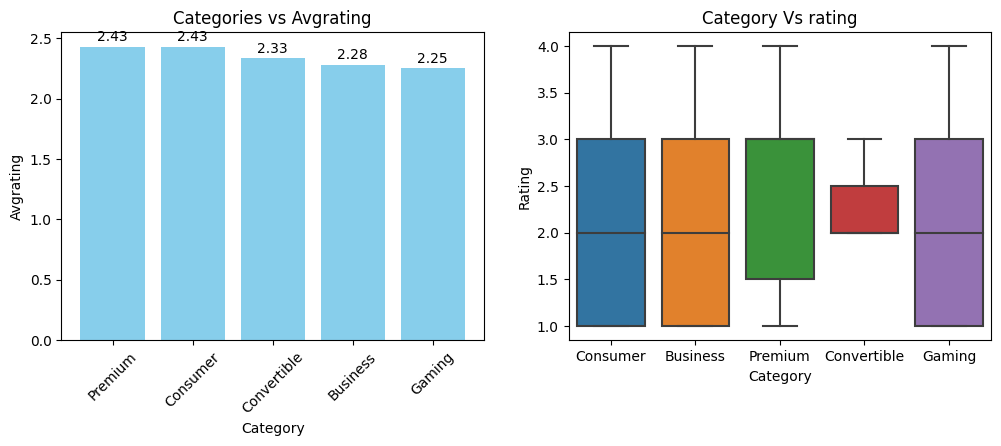

In [71]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

axes[0].bar(category_avgrating['category'], category_avgrating['avgrating'], color='skyblue')
axes[0].set_title("Categories vs Avgrating")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Avgrating")
axes[0].tick_params(axis='x', rotation=45)

for i, v in enumerate(category_avgrating['avgrating']):
    val=round(v,2)
    axes[0].text(i, val+0.05, str(val), color="black", ha="center")
    
sns.boxplot(data=df, x="category", y="rating", ax=axes[1])
axes[1].set_title("Category Vs rating")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Rating")

plt.show()

- Despite similar average ratings across categories, the box plot reveals that Convertible products have the tightest and most consistent customer satisfaction range.

### Do expensive laptops get better ratings?

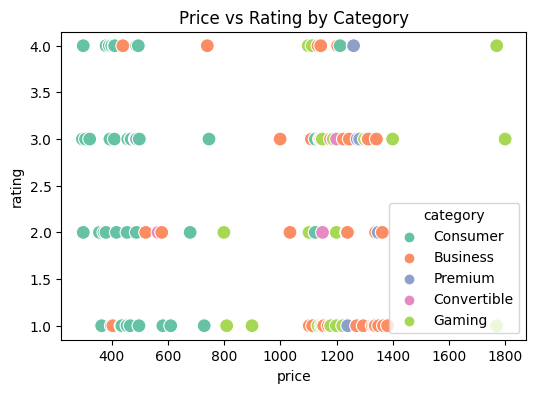

In [74]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="price",
    y="rating",
    hue="category",   # 👈 this creates the legend
    palette="Set2",   # optional: choose color palette
    s=100             # optional: marker size
)

plt.title("Price vs Rating by Category")
plt.show()


From the above scatter plot it is evident that there is no correlation between price and rating low price products are have the high rating high price products are also having the least rating 

### Review count distribution
#### Are most products frequently reviewed or rarely reviewed?
#### what is the highest number of reviews does the products have?

In [78]:
reviews = df.reviews.value_counts().reset_index()
#ratings['rating'] = ratings['rating'].astype('str')
reviews

reviews  count
0         2     13
1         7     11
2         8     10
3         9     10
4         4      9
5        14      8
6        12      8
7         0      8
8        10      8
9         1      7
10        5      6
11        6      6
12       11      6
13       13      5
14        3      2

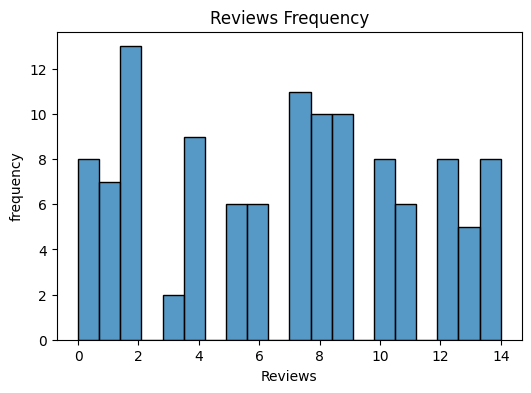

In [80]:
plt.figure(figsize=(6,4))
#plt.hist(df['price'],bins=20)
sns.histplot(data=df, x="reviews",bins=20)
plt.title("Reviews Frequency")
plt.xlabel("Reviews")
plt.ylabel("frequency")
plt.show()

Most of the products got only 2 reviews which is very poor
- It may suggest limited market reach, new listings, or low customer feedback activity.


#### Which brand attracts more customer engagement?

In [84]:
print(df.reviews.sum())
brand_total_reviews = (
    df.groupby('brand')['reviews']
    .sum()
    .reset_index(name="total_reviews")
    .sort_values(by='total_reviews',ascending=False)
)
brand_total_reviews

807


brand  total_reviews
5     Lenovo            196
3       Dell            158
0       Acer            153
2       Asus            122
4         HP             59
6        MSI             43
8    Toshiba             37
7  Prestigio             20
1      Apple             19

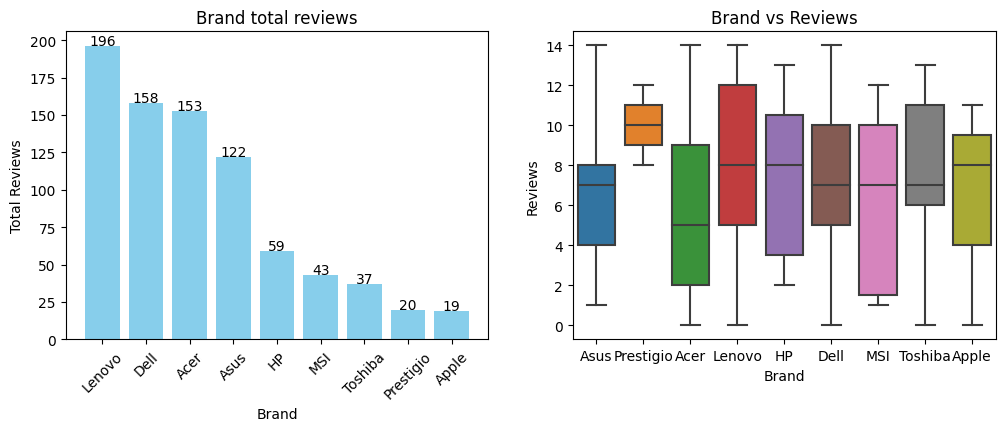

In [86]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

axes[0].bar(brand_total_reviews['brand'], brand_total_reviews['total_reviews'], color='skyblue')
axes[0].set_title("Brand total reviews")
axes[0].set_xlabel("Brand")
axes[0].set_ylabel("Total Reviews")
axes[0].tick_params(axis='x', rotation=45)

for i, v in enumerate(brand_total_reviews['total_reviews']):
   axes[0].text(i, v+0.5, str(v), color="black", ha="center")

sns.boxplot(data=df, x="brand", y="reviews", ax=axes[1])
axes[1].set_title("Brand vs Reviews")
axes[1].set_xlabel("Brand")
axes[1].set_ylabel("Reviews")

plt.show()

- From the above bar chart we can say Lenovo brand has got high engagement interms of reviews followed by Dell and Acer
- From the boxplot Prestigio has a high median review count with a tight interquartile range, meaning most of its products consistently receive more reviews than other brands.

#### Which categories attract more customer engagement

In [90]:
print(df.reviews.sum())
category_total_reviews = (
    df.groupby('category')['reviews']
    .sum()
    .reset_index(name="total_reviews")
    .sort_values(by='total_reviews',ascending=False)
)
category_total_reviews

807


category  total_reviews
1     Consumer            294
0     Business            273
3       Gaming            172
4      Premium             49
2  Convertible             19

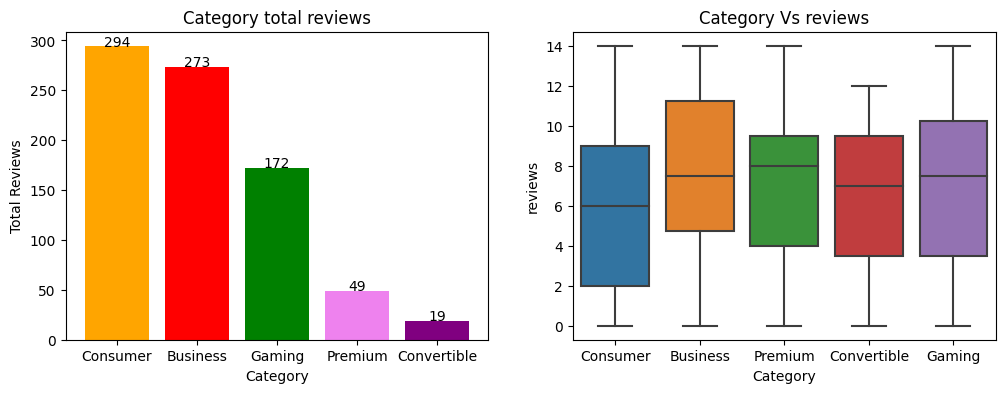

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(category_total_reviews['category'], category_total_reviews['total_reviews'], color=['orange','red','green','violet','purple'])
axes[0].set_title("Category total reviews")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Total Reviews")

for i, v in enumerate(category_total_reviews['total_reviews']):
   axes[0].text(i, v+0.5, str(v), color="black", ha="center")

sns.boxplot(data=df, x="category", y="reviews", ax=axes[1])
axes[1].set_title("Category Vs reviews")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("reviews")

plt.show()

- From the above bar chart consumer segment has got highest engagement interms of reviews followed by Business and then Gaming.
- Box plot suggests that Business laptops demonstrate high and consistent customer engagement, rivaling Gaming in median reviews but outperforming it in reliability and spread.

#### Do cheaper products get more reviews?

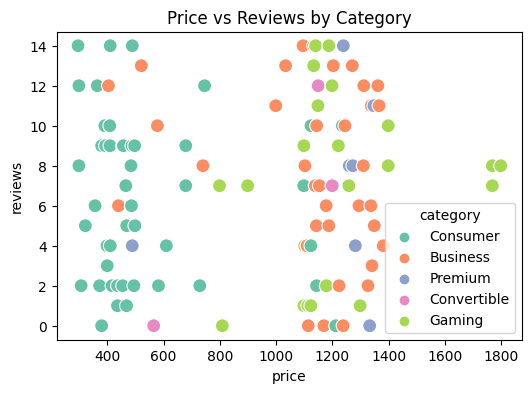

In [96]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="price",
    y="reviews",
    hue="category",   # 👈 this creates the legend
    palette="Set2",   # optional: choose color palette
    s=100             # optional: marker size
)

plt.title("Price vs Reviews by Category")
plt.show()

There is no correlation between Price and Reviews high price products got both high and low total reviews and the same way low price customers also got both low and high total reviews

### Are most reviewed products (popular by engagement) also highly rated?

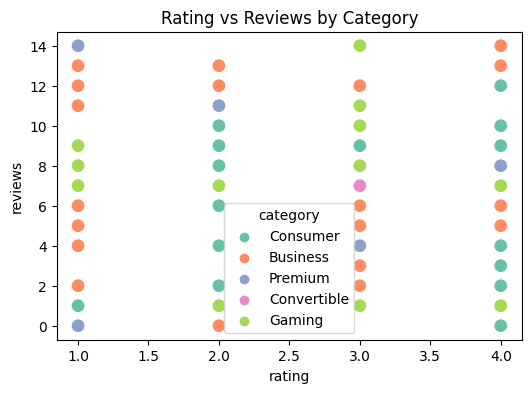

In [100]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="rating",
    y="reviews",
    hue="category",   # 👈 this creates the legend
    palette="Set2",   # optional: choose color palette
    s=100             # optional: marker size
)

plt.title("Rating vs Reviews by Category")
plt.show()

No correlation between rating and review from the above scatter plot

### Which brands offer best value?

In [104]:
df["value_score"] = df["rating"] / df["price"]
df.head()

product_name   price  rating  reviews  category  \
0          Asus VivoBook X441NA-GA190  295.99       3       14  Consumer   
1  Prestigio SmartBook 133S Dark Grey  299.00       2        8  Consumer   
2       Prestigio SmartBook 133S Gold  299.00       4       12  Consumer   
3                       Aspire E1-510  306.99       3        2  Consumer   
4                   Lenovo V110-15IAP  321.94       3        5  Consumer   

                                productlist      brand     series  value_score  
0            [Asus, VivoBook, X441NA-GA190]       Asus   VivoBook     0.010135  
1  [Prestigio, SmartBook, 133S, Dark, Grey]  Prestigio  SmartBook     0.006689  
2        [Prestigio, SmartBook, 133S, Gold]  Prestigio  SmartBook     0.013378  
3                          [Aspire, E1-510]       Acer     Aspire     0.009772  
4                      [Lenovo, V110-15IAP]     Lenovo   V-Series     0.009319

In [106]:
brand_best_valuescore = (
    df.groupby('brand')['value_score']
    .mean()
    .reset_index()
    .sort_values(by='value_score',ascending=False)
)
brand_best_valuescore

brand  value_score
7  Prestigio     0.010033
0       Acer     0.005087
2       Asus     0.003342
5     Lenovo     0.003326
4         HP     0.003124
3       Dell     0.002450
1      Apple     0.001803
6        MSI     0.001583
8    Toshiba     0.001318

Prestigio is good value for price since the rating per unit price is high followed by Acer and then Asus

### which categories offer best value

In [110]:
category_best_valuescore = (
    df.groupby('category')['value_score']
    .mean()
    .reset_index()
    .sort_values(by='value_score',ascending=False)
)
category_best_valuescore

category  value_score
1     Consumer     0.005364
2  Convertible     0.002593
4      Premium     0.002436
0     Business     0.002281
3       Gaming     0.001856

Not plotting the value_score since the values are too small

Overall consumer category is happy for the purchases since the mean of the rating per unit price is high for the consumer segment followed by convertible

In [144]:
from sklearn.preprocessing import MinMaxScaler

#Since the value_score values were very small, I applied MinMaxScaler to rescale them into a more interpretable range.
scaler = MinMaxScaler()
df["value_score_scaled"] = scaler.fit_transform(
    df[["value_score"]]
)


#### Brand popularity is identified by using reviews in this scenario

In [122]:
df["popularity"] = (df["reviews"] >= df["reviews"].median()).astype(int)

In [124]:
df.popularity.value_counts()

popularity
1    66
0    51
Name: count, dtype: int64

### Model Building
#### Popularity Prediction (Binary Classification)

In [127]:
X = df[[
    "price",
    "rating",
    "value_score_scaled",
    "brand",
    "category"
]]

y = df["popularity"]

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split the data into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

categorical_features = ["brand", "category"]
numerical_features = ["price", "rating", "value_score_scaled"]

# ONE-HOT Encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)


### Model BenchMarking

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score,accuracy_score
from sklearn.pipeline import Pipeline

models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced",C=0.5,max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300,max_depth=5,min_samples_split=5,min_samples_leaf=3,class_weight="balanced",random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,max_depth=3)
}

In [133]:
results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    score = f1_score(y_test, y_pred)
    acc_score = accuracy_score(y_test, y_pred)
    results.append((name, score, acc_score))

benchmark_df = pd.DataFrame(results, columns=["Model", "F1 Score", "Accuracy"])
benchmark_df.sort_values(by="F1 Score", ascending=False)

Model  F1 Score  Accuracy
2        Random Forest  0.666667  0.583333
1        Decision Tree  0.592593  0.541667
3    Gradient Boosting  0.500000  0.416667
0  Logistic Regression  0.480000  0.458333

Initially, the model was evaluated using a single train–test split. However, the obtained performance was highly dependent on how the data was split, especially given the limited dataset size and class imbalance. To reduce this dependency and ensure a more robust evaluation, Stratified K-Fold Cross-Validation was used. This approach preserves class distribution in each fold and evaluates the model across multiple splits, providing a more stable and generalized performance estimate.

In [137]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# MODEL EVALUATION
results = []

for name, model in models.items():
    
    pipeline = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    
    f1_scores = cross_val_score(
        pipeline,
        X,
        y,
        scoring="f1",
        cv=cv
    )
    
    results.append({
        "Model": name,
        "Mean F1 Score": f1_scores.mean(),
        "Std F1 Score": f1_scores.std()
    })

results_df = pd.DataFrame(results).sort_values(
    by="Mean F1 Score",
    ascending=False
)

print("\nModel Benchmarking Results:")
print(results_df)


Model Benchmarking Results:
                 Model  Mean F1 Score  Std F1 Score
1        Decision Tree       0.654433      0.058877
2        Random Forest       0.600240      0.082661
3    Gradient Boosting       0.582035      0.077650
0  Logistic Regression       0.567609      0.046871


Although cross-validation does not directly improve model learning, the Stratified K-Fold approach produced higher average F1 scores for DecisionTree, Gradient Boosting and Logistic Regression models compared to a single train–test split. This indicates that the initial split was not fully representative of the data distribution. Cross-validation provided a more balanced and stable evaluation by averaging performance across multiple stratified folds, especially important given the small dataset size.

In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 5, 10],
    "model__min_samples_split": [2, 5, 10]
}

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        random_state=42,
        class_weight="balanced"
    ))
])

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['brand',
                                                                          'category']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['price',
                                                                          'rating',
                                                                          'value_score_scaled'])])),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 5, 10],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='f1')

In [141]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 100}
0.5508857808857809


- Model capacity is not the bottleneck
Tree-based models (Decision Tree, Random Forest, Gradient Boosting) already capture non-linear patterns.
Similar performance across multiple models indicates a data limitation, not a model limitation.

- Hyperparameter tuning reached diminishing returns
GridSearchCV explores many parameter combinations.
When tuned models perform worse or similarly, it indicates the base model is already near optimal.

- Cross-validation improved reliability, not learning
Stratified K-Fold reduced performance variance.
The mean F1-score (~0.65) represents the true generalization capability of the model.

#### The processed dataset, including all newly engineered and analytical fields, was saved as a CSV file to facilitate interactive dashboard development and reporting in Power BI.

In [146]:
df.to_csv("ecommerce_products_data.csv", index=False)